In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
loan_df=pd.read_csv("train_ctrUa4K.csv")
loan_df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

$$Check And Clean Train Data.$$

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
cat_cols=loan_df.select_dtypes(include="object").columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
num_cols=loan_df.select_dtypes(exclude="object").columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
len(loan_df["Loan_ID"].unique())

614

In [9]:
for i in cat_cols[1:]:
    unique_labels=loan_df[i].unique()
    print(i,unique_labels)


Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [10]:
for i in num_cols[1:]:
    unique_labels=loan_df[i].unique()
    print(i,unique_labels)

CoapplicantIncome [0.00000000e+00 1.50800000e+03 2.35800000e+03 4.19600000e+03
 1.51600000e+03 2.50400000e+03 1.52600000e+03 1.09680000e+04
 7.00000000e+02 1.84000000e+03 8.10600000e+03 2.84000000e+03
 1.08600000e+03 3.50000000e+03 5.62500000e+03 1.91100000e+03
 1.91700000e+03 2.92500000e+03 2.25300000e+03 1.04000000e+03
 2.08300000e+03 3.36900000e+03 1.66700000e+03 3.00000000e+03
 2.06700000e+03 1.33000000e+03 1.45900000e+03 7.21000000e+03
 1.66800000e+03 1.21300000e+03 2.33600000e+03 3.44000000e+03
 2.27500000e+03 1.64400000e+03 1.16700000e+03 1.59100000e+03
 2.20000000e+03 2.25000000e+03 2.85900000e+03 3.79600000e+03
 3.44900000e+03 4.59500000e+03 2.25400000e+03 3.06600000e+03
 1.87500000e+03 1.77400000e+03 4.75000000e+03 3.02200000e+03
 4.00000000e+03 2.16600000e+03 1.88100000e+03 2.53100000e+03
 2.00000000e+03 2.11800000e+03 4.16700000e+03 2.90000000e+03
 5.65400000e+03 1.82000000e+03 2.30200000e+03 9.97000000e+02
 3.54100000e+03 3.26300000e+03 3.80600000e+03 3.58300000e+03
 7.540

In [11]:
loan_df["Gender"]=loan_df["Gender"].fillna(loan_df["Gender"].mode()[0])
loan_df["Married"]=loan_df["Married"].fillna(loan_df["Married"].mode()[0])

In [12]:
loan_df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
l=[i for i in loan_df["Dependents"].unique()]
#D_mode=loan_df["Dependents"].mode()[0]
for i in l[3:]:
    con=loan_df["Dependents"].values==i
    loan_df["Dependents"]=np.where(con,"3",loan_df["Dependents"].values)
loan_df["Dependents"].unique() 

array(['0', '1', '2', '3', nan], dtype=object)

In [14]:
loan_df["Dependents"]=loan_df["Dependents"].fillna(loan_df["Dependents"].mode()[0])
loan_df["Self_Employed"]=loan_df["Self_Employed"].fillna(loan_df["Self_Employed"].mode()[0])
loan_df["LoanAmount"]=loan_df["LoanAmount"].fillna(loan_df["LoanAmount"].mode()[0])
loan_df["Loan_Amount_Term"]=loan_df["Loan_Amount_Term"].fillna(loan_df["Loan_Amount_Term"].mode()[0])

In [15]:
loan_df["Credit_History"] = loan_df["Credit_History"].fillna(loan_df["Credit_History"].mode()[0])
loan_df["Credit_History"] = loan_df["Credit_History"].astype("int")
loan_df["Credit_History"] = loan_df["Credit_History"].map({1:'Y',0:'N'})
loan_df["Credit_History"].unique()

array(['Y', 'N'], dtype=object)

In [16]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

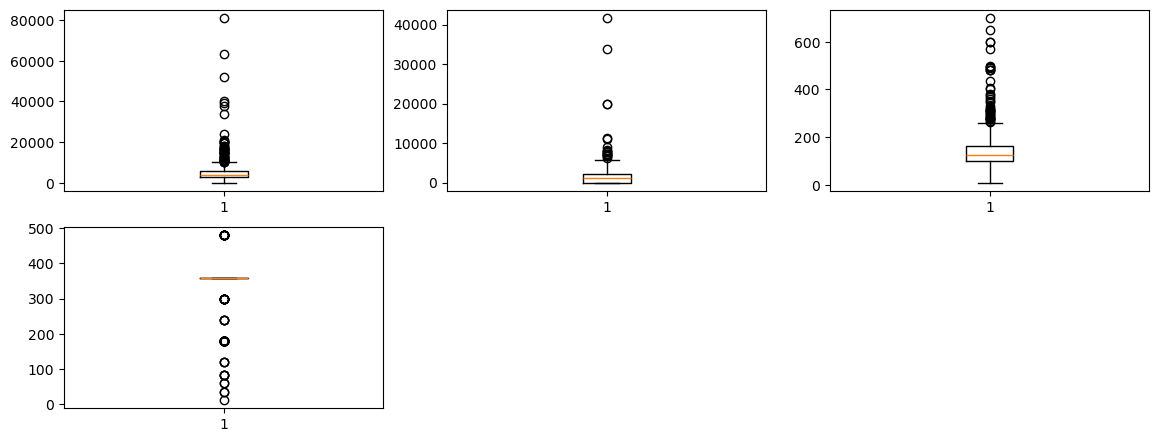

In [17]:
num_cols=loan_df.select_dtypes(exclude="object").columns
plt.figure(figsize=(14,8))
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1).boxplot(loan_df[num_cols[i]])   

In [18]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
q1=np.percentile(loan_df["ApplicantIncome"],25)
q2=np.percentile(loan_df["ApplicantIncome"],50)
q3=np.percentile(loan_df["ApplicantIncome"],75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q1+1.5*IQR
con1=loan_df["ApplicantIncome"]>lb
con2=loan_df["ApplicantIncome"]<ub
con_a=con1&con2
#=================================================
q1=np.percentile(loan_df["CoapplicantIncome"],25)
q2=np.percentile(loan_df["CoapplicantIncome"],50)
q3=np.percentile(loan_df["CoapplicantIncome"],75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q1+1.5*IQR
con1=loan_df["CoapplicantIncome"]>lb
con2=loan_df["CoapplicantIncome"]<ub
con_c=con1&con2
#================================================
q1=np.percentile(loan_df["LoanAmount"],25)
q2=np.percentile(loan_df["LoanAmount"],50)
q3=np.percentile(loan_df["LoanAmount"],75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q1+1.5*IQR
con1=loan_df["LoanAmount"]>lb
con2=loan_df["LoanAmount"]<ub
con_l=con1&con2
#========================
loan_df[con_a]
loan_df[con_c]
loan_df[con_l]
#========================
con=con_a|con_c|con_l
loan_df=loan_df[con]
loan_df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       120.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0                Y         Urban           Y  
1                Y         Rural           N  
2                Y         Urban           Y  
3                Y         Urban           Y  
4                Y         Urban           Y  
..             ...           ...         ...  
609              Y         Rural           Y  
610              Y         Rural           Y  
611              Y         Urban           Y  
612              Y         Urban           Y  
613              N     Semiurban           N  

[607 rows x 13 columns]

In [20]:
new_loan_df=loan_df.drop("Loan_ID",axis=1)
#===================Encode the data====================================

cat_colms=new_loan_df.select_dtypes(include="object").columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_colms:
    new_loan_df[i]=le.fit_transform(new_loan_df[i])
new_loan_df1=new_loan_df.drop("Loan_Status",axis=1)
#===============Scaled the data========================================
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler_data=ss.fit_transform(new_loan_df1)
scaled_train_df=pd.DataFrame(scaler_data,columns=new_loan_df1.columns)
scaled_train_df["Loan_Status"]=new_loan_df["Loan_Status"]
scaled_train_df["Loan_Status"]=scaled_train_df["Loan_Status"].fillna(scaled_train_df["Loan_Status"].mode()[0])
scaled_train_df

Gender   Married  Dependents  Education  Self_Employed  \
0    0.475671 -1.364994   -0.735222  -0.532258      -0.386809   
1    0.475671  0.732604    0.254312  -0.532258      -0.386809   
2    0.475671  0.732604   -0.735222  -0.532258       2.585255   
3    0.475671  0.732604   -0.735222   1.878790      -0.386809   
4    0.475671 -1.364994   -0.735222  -0.532258      -0.386809   
..        ...       ...         ...        ...            ...   
602 -2.102295 -1.364994   -0.735222  -0.532258      -0.386809   
603  0.475671  0.732604    2.233380  -0.532258      -0.386809   
604  0.475671  0.732604    0.254312  -0.532258      -0.386809   
605  0.475671  0.732604    1.243846  -0.532258      -0.386809   
606 -2.102295 -1.364994   -0.735222  -0.532258       2.585255   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.087109          -0.542565   -0.283355          0.273472   
1          -0.121616          -0.018879   -0.181680          0.273472   
2          -0.382605          -0.542565   -0.969664          0.273472   
3          -0.451355           0.276302   -0.283355          0.273472   
4           0.112005          -0.542565   -0.016457          0.273472   
..               ...                ...         ...               ...   
602        -0.399092          -0.542565   -0.906117          0.273472   
603        -0.200259          -0.542565   -1.300109         -2.508613   
604         0.453615          -0.459220    1.406998          0.273472   
605         0.372994          -0.542565    0.568176          0.273472   
606        -0.121616          -0.542565   -0.118133          0.273472   

     Credit_History  Property_Area  Loan_Status  
0          0.411773       1.217628          1.0  
1          0.411773      -1.330993          0.0  
2          0.411773       1.217628          1.0  
3          0.411773       1.217628          1.0  
4          0.411773       1.217628          1.0  
..              ...            ...          ...  
602        0.411773      -1.330993          1.0  
603        0.411773      -1.330993          1.0  
604        0.411773       1.217628          1.0  
605        0.411773       1.217628          0.0  
606       -2.428524      -0.056683          1.0  

[607 rows x 12 columns]

In [21]:
#============================Ready data to build models=======================================

$$ CheackAndClean Test Data$$

In [23]:
x_test_data=pd.read_csv("test_lAUu6dG.csv")
x_test_data

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
3               2340               2546       100.0             360.0   
4               3276                  0        78.0             360.0   
..               ...                ...         ...               ...   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
0               1.0         Urban  
1               1.0         Urban  
2               1.0         Urban  
3               NaN         Urban  
4               1.0         Urban  
..              ...           ...  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Semiurban  
365             1.0         Rural  
366             1.0         Rural  

[367 rows x 12 columns]

In [24]:
cat_cols=x_test_data.select_dtypes(include="object").columns
for i in cat_cols[1:]:
    unique_labels=x_test_data[i].unique()
    print(i,unique_labels)

Gender ['Male' 'Female' nan]
Married ['Yes' 'No']
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Semiurban' 'Rural']


In [25]:
x_test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
l=[i for i in x_test_data["Dependents"].unique()]
#D_mode=loan_df["Dependents"].mode()[0]
for i in l[3:]:
    con=x_test_data["Dependents"].values==i
    x_test_data["Dependents"]=np.where(con,"3",x_test_data["Dependents"].values)
x_test_data["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [27]:
x_test_data["Gender"]=x_test_data["Gender"].fillna(x_test_data["Gender"].mode()[0])
x_test_data["Dependents"]=x_test_data["Dependents"].fillna(x_test_data["Dependents"].mode()[0])
x_test_data["Self_Employed"]=x_test_data["Self_Employed"].fillna(x_test_data["Self_Employed"].mode()[0])
x_test_data["Credit_History"]=x_test_data["Credit_History"].fillna(x_test_data["Credit_History"].mode()[0])
x_test_data["LoanAmount"]=x_test_data["LoanAmount"].fillna(x_test_data["LoanAmount"].mean())
x_test_data["Loan_Amount_Term"]=x_test_data["Loan_Amount_Term"].fillna(x_test_data["Loan_Amount_Term"].mean())
x_test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


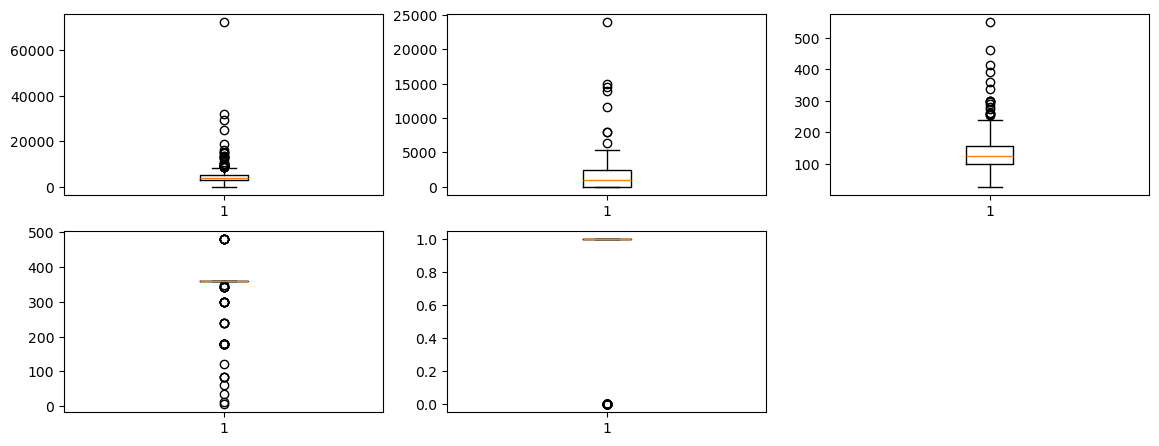

In [28]:
num_cols=x_test_data.select_dtypes(exclude="object").columns
plt.figure(figsize=(14,8))
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1).boxplot(x_test_data[num_cols[i]])
print(num_cols)

In [29]:
#===============we can remove outliers , but not need to remove from test data.=================

In [30]:
x_test_data

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes          3  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
3               2340               2546       100.0             360.0   
4               3276                  0        78.0             360.0   
..               ...                ...         ...               ...   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
0               1.0         Urban  
1               1.0         Urban  
2               1.0         Urban  
3               1.0         Urban  
4               1.0         Urban  
..              ...           ...  
362             1.0         Urban  
363             1.0         Urban  
364             1.0     Semiurban  
365             1.0         Rural  
366             1.0         Rural  

[367 rows x 12 columns]

In [31]:
x_new_test_data=x_test_data.drop("Loan_ID",axis=1)
#===================Encode the data====================================
cat_colm=x_new_test_data.select_dtypes(include="object").columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_colm:
    x_new_test_data[i]=le.fit_transform(x_new_test_data[i])

#===============Scaled the data========================================
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler_data=ss.fit_transform(x_new_test_data)
scaled_test_df=pd.DataFrame(scaler_data,columns=x_new_test_data.columns)
scaled_test_df      #x test data 367 row

Gender   Married  Dependents  Education  Self_Employed  \
0    0.485479  0.758358   -0.758222  -0.544812      -0.334845   
1    0.485479  0.758358    0.181871  -0.544812      -0.334845   
2    0.485479  0.758358    1.121964  -0.544812      -0.334845   
3    0.485479  0.758358    1.121964  -0.544812      -0.334845   
4    0.485479 -1.318638   -0.758222   1.835497      -0.334845   
..        ...       ...         ...        ...            ...   
362  0.485479  0.758358    2.062056   1.835497       2.986456   
363  0.485479  0.758358   -0.758222  -0.544812      -0.334845   
364  0.485479 -1.318638   -0.758222  -0.544812      -0.334845   
365  0.485479  0.758358   -0.758222  -0.544812      -0.334845   
366  0.485479 -1.318638   -0.758222  -0.544812       2.986456   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.186461          -0.673335   -0.429368          0.270603   
1          -0.352692          -0.029848   -0.166482          0.270603   
2           0.039641           0.098849    1.180807          0.270603   
3          -0.502774           0.418877   -0.593671          0.270603   
4          -0.311909          -0.673335   -0.955139          0.270603   
..               ...                ...         ...               ...   
362        -0.162439           0.088982   -0.380077          0.270603   
363        -0.132056          -0.369180   -0.347216          0.270603   
364        -0.317211           0.181644   -0.166482          0.270603   
365         0.039641           0.353241    0.359289          0.270603   
366         0.896087          -0.673335   -0.626532         -2.518700   

     Credit_History  Property_Area  
0          0.437674       1.118764  
1          0.437674       1.118764  
2          0.437674       1.118764  
3          0.437674       1.118764  
4          0.437674       1.118764  
..              ...            ...  
362        0.437674       1.118764  
363        0.437674       1.118764  
364        0.437674      -0.095989  
365        0.437674      -1.310741  
366        0.437674      -1.310741  

[367 rows x 11 columns]

$$Model Development$$

$$Logistic Regression model$$

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [97]:
X=scaled_train_df.drop("Loan_Status",axis=1)
y=scaled_train_df["Loan_Status"]
#==================================================================

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1232)
#==========================================================

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()                       #base model


#=============================================================
params=lr_model.get_params()
print(params)
#=============================================================     how to given diffirent different params???

params_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300], 
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False], 
    'tol': [0.0001, 0.001, 0.01],
    'warm_start': [True, False]
    }


#==================================================================
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(lr_model,
                        params_grid,
                        scoring="accuracy",
                        cv=5,
                        verbose=True)

#=================================================================
import time
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("Time:",start-end)

#===============================================================
lr_best_model=grid_search.best_estimator_
y_prediction=lr_best_model.predict(x_test)
print("split_prediction:",y_prediction)
#=======================================================================
y_prediction_test_data=lr_best_model.predict(scaled_test_df)
print("test_predection:",y_prediction_test_data)
#=============================================================
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

lr_accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",lr_accuracy)
lr_precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",lr_precision)
lr_recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",lr_recall)
lr_f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",lr_f1_score)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Time: -147.5976014137268
split_prediction: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
test_predection: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1

$$Decision Tree$$

In [36]:
X=scaled_train_df.drop("Loan_Status",axis=1)
y=scaled_train_df["Loan_Status"]
#=============================================================

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1232)
#==========================================================

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()                       #base model


#=============================================================
params=dt_model.get_params()
print(params)
#=============================================================
params_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'class_weight': [None, 'balanced'],
    'splitter': ['best', 'random'],
    'random_state': [1232]}

#==================================================================
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(dt_model,
                        params_grid,
                        scoring="accuracy",
                        cv=5,
                        verbose=True)

#=================================================================
grid_search.fit(x_train,y_train)
#===============================================================
dt_best_model=grid_search.best_estimator_
y_prediction=dt_best_model.predict(x_test)
print("split_prediction:",y_prediction)
#=========================================================================
y_prediction_test_data=dt_best_model.predict(scaled_test_df)
print("test_predection:",y_prediction_test_data)
#================================================================================
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

dt_accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",dt_accuracy)
dt_precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",dt_precision)
dt_recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",dt_recall)
dt_f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",dt_f1_score)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
split_prediction: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
test_predection: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1

$$KNN model$$

In [38]:
X=scaled_train_df.drop("Loan_Status",axis=1)
y=scaled_train_df["Loan_Status"]
#=====================================================

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1232)
#==========================================================

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()                       #base model


#=============================================================
params=knn_model.get_params()
print(params)
#=============================================================
params_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],  
    'weights': ['uniform', 'distance'], 
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size': [20, 30, 40],
}

#==================================================================

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(knn_model,
                        params_grid,
                        scoring="accuracy",
                        cv=5,
                        verbose=True)

#=================================================================
grid_search.fit(x_train,y_train)

#===============================================================
knn_best_model=grid_search.best_estimator_
y_prediction=knn_best_model.predict(x_test)
print("split_prediction:",y_prediction)
#===========================================================================
y_prediction_test_data=knn_best_model.predict(scaled_test_df)
print("test_predection:",y_prediction_test_data)
#=============================================================
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

knn_accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",knn_accuracy)
knn_precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",knn_precision)
knn_recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",knn_recall)
knn_f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",knn_f1_score)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
split_prediction: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
test_predection: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1

$$Naive Bayes$$

In [40]:
X=new_loan_df.drop("Loan_Status",axis=1)
y=new_loan_df["Loan_Status"]
#==============================================================

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1232)
#==========================================================

from sklearn.naive_bayes import GaussianNB
nv_model=GaussianNB()                       #base model

#=============================================================
params=nv_model.get_params()
print(params)

#=============================================================
params_grid = {
    'priors': [None, [0.4, 0.6], [0.3, 0.7]],  
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06] 
}

#==================================================================
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(nv_model,
                        params_grid,
                        scoring="accuracy",
                        cv=5,
                        verbose=True)

#=================================================================
grid_search.fit(x_train,y_train)
#===============================================================
nv_best_model=grid_search.best_estimator_
y_prediction=nv_best_model.predict(x_test)
print("split_prediction:",y_prediction)
#====================================================================
y_prediction_test_data=nv_best_model.predict(scaled_test_df)
print("test_predection:",y_prediction_test_data)
#=============================================================
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

nv_accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",nv_accuracy)
nv_precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",nv_precision)
nv_recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",nv_recall)
nv_f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",nv_f1_score)

{'priors': None, 'var_smoothing': 1e-09}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
split_prediction: [0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1]
test_predection: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

$$Random Forest$$

In [42]:
X=new_loan_df.drop("Loan_Status",axis=1)
y=new_loan_df["Loan_Status"]
#===========================================================================

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1232)
#==========================================================

from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()                       #base model

#=============================================================
params=rf_model.get_params()
print(params)

#=============================================================
params_grid = {
    'n_estimators': [100, 150, 200, 300], 
    'max_depth': [10, 20, 30, None], 
    'max_features': ['sqrt', 'log2', None], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False], 
    'oob_score': [True, False], 
    'class_weight': [None, 'balanced'], 
    'random_state': [1232] 
}


#==================================================================
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(rf_model,
                        params_grid,
                        scoring="accuracy",
                        cv=5,
                        verbose=True)

#=================================================================
grid_search.fit(x_train,y_train)
#===============================================================
rf_best_model=grid_search.best_estimator_
y_prediction=rf_best_model.predict(x_test)
print("split_prediction:",y_prediction)
#================================================================
y_prediction_test_data=rf_best_model.predict(scaled_test_df)
print("test_predection:",y_prediction_test_data)
#=============================================================
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

rf_accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",rf_accuracy)
rf_precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",rf_precision)
rf_recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",rf_recall)
rf_f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",rf_f1_score)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4320 fits failed out of a total of 17280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mrityunjay\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, i

split_prediction: [0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1]
test_predection: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [43]:
import os 
root_dir=os.getcwd()
new_folder="Tuning_model"
new_dir=os.path.join(root_dir,new_folder)
os.makedirs(new_dir)

In [44]:
new_dir

'C:\\Users\\Mrityunjay\\Data Science Naresh it\\Class Assiments\\Machain Learning\\Model_development\\Loan_predection\\Tuning_model'

In [49]:
pickle.dump(lr_model,open(f"{new_dir}\\{"lr_model.pickel"}","wb"))
pickle.dump(dt_model,open(f"{new_dir}\\{"dt_model.pickel"}","wb"))
pickle.dump(knn_model,open(f"{new_dir}\\{"knn_model.pickel"}","wb"))
pickle.dump(nv_model,open(f"{new_dir}\\{"nv_model.pickel"}","wb"))
pickle.dump(rf_model,open(f"{new_dir}\\{"rf_model.pickel"}","wb"))

In [93]:
columns = pd.MultiIndex.from_tuples([
    ('logistic_regression', 'without_tuning'), ('logistic_regression', 'tuning'),
    ('decision_tree', 'without_tuning'), ('decision_tree', 'tuning'),
    ('knn', 'without_tuning'), ('knn', 'tuning'),
    ('naive_bayes', 'without_tuning'), ('naive_bayes', 'tuning'),
    ('random_forest', 'without_tuning'), ('random_forest', 'tuning')])

df_columns = pd.DataFrame(
    [
        [0.83, 0.69, 0.6, 0.69, 0.81, 0.65, 0.82, 0.78, 0.74, 0.78],
        [0.81, 0.69, 0.78, 0.69, 0.81, 0.68, 0.81, 0.75, 0.79,  0.75],
        [0.99, 0.1, 0.58, 0.98, 0.94, 0.90, 0.96, 0.97, 0.85, 0.97],
        [0.89, 0.82, 0.67, 0.81, 0.87, 0.78, 0.88, 0.85, 0.82, 0.85]],
    columns=columns,index=["Accuracy","precision","Recall","F1_score"])

df_columns

logistic_regression         decision_tree                   knn  \
               without_tuning tuning without_tuning tuning without_tuning   
Accuracy                 0.83   0.69           0.60   0.69           0.81   
precision                0.81   0.69           0.78   0.69           0.81   
Recall                   0.99   0.10           0.58   0.98           0.94   
F1_score                 0.89   0.82           0.67   0.81           0.87   

                    naive_bayes         random_forest         
          tuning without_tuning tuning without_tuning tuning  
Accuracy    0.65           0.82   0.78           0.74   0.78  
precision   0.68           0.81   0.75           0.79   0.75  
Recall      0.90           0.96   0.97           0.85   0.97  
F1_score    0.78           0.88   0.85           0.82   0.85